# Understanding Descriptive Statistics

Import the necessary libraries here:

In [55]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [56]:
# your code here
def roll_dice():
    rolls = []
    for _ in range(10):
        rolls.append(random.randint(1, 6))
    return pd.DataFrame(rolls, columns=['Roll'])

results = roll_dice()
results

,Roll
0,6
1,1
2,4
3,4
4,1
5,4
6,3
7,6
8,4
9,4


#### 2.- Plot the results sorted by value.

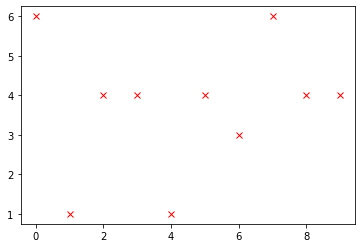

In [57]:
# your code here
plt.plot(results.sort_values(by='Roll'), 'rx')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<AxesSubplot:title={'center':'Roll'}>]], dtype=object)

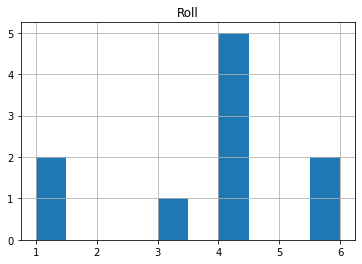

In [58]:
# your code here
results.sort_values(by='Roll').hist()

In [ ]:
"""
your comments here
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [59]:
# your code here
def mean(x):
    return sum(x) / len(x)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [60]:
# your code here
def freq_dist(x):
    return x.value_counts().to_dict().values()

mean(freq_dist(results['Roll'])) # not beautiful, but short

2.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [92]:
# your code here
def median(x):
    n = len(x)
    s = sorted(x)
    if n % 2 == 0:
        idx = n//2
        return (s[idx-1] + s[idx])/2
    else:
        return s[n//2]

median(results['Roll'])

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [93]:
# your code here
results.describe()

,Roll
count,10.000000
mean,3.700000
std,1.702939
min,1.000000
25%,3.250000
50%,4.000000
75%,4.000000
max,6.000000


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

<BarContainer object of 100 artists>

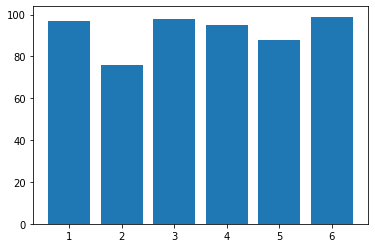

In [101]:
# your code here
values = pd.read_csv('../data/roll_the_dice_hundred.csv')
plt.bar(values['value'], values['roll'])

In [102]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [104]:
# your code here
mean(values['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [108]:
# your code here
freq_dist(values['value']) # 23 times for number 1, 22 for number 2, ...

dict_values([23, 22, 17, 14, 12, 12])

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12., 17., 14., 22., 12., 23.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

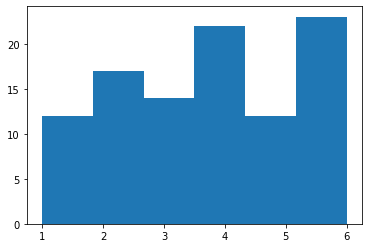

In [119]:
# your code here
plt.hist(values['value'], bins=6)

In [69]:
"""
We see the mean (3.74) in the area where there are more values
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [111]:
# your code here
thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
thousand.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


'\nas the sample is \n'

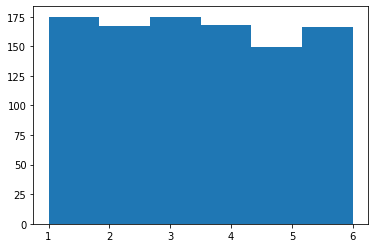

In [113]:
plt.hist(thousand['value'], bins=6)
"""
as the sample is bigger we have the values more evenly distributed
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

Frequency distribution =  dict_values([45, 36, 34, 33, 32, 32, 31, 30, 30, 30, 29, 29, 27, 26, 25, 24, 23, 23, 23, 22, 20, 19, 19, 19, 18, 17, 17, 16, 16, 15, 14, 14, 13, 13, 13, 12, 11, 11, 10, 10, 9, 8, 8, 8, 7, 7, 7, 7, 6, 5, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1])


(array([23.,  9., 10.,  6.,  5.,  7.,  6.,  5.,  0.,  1.]),
 array([ 1. ,  5.4,  9.8, 14.2, 18.6, 23. , 27.4, 31.8, 36.2, 40.6, 45. ]),
 <BarContainer object of 10 artists>)

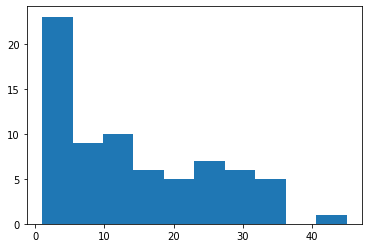

In [122]:
# your code here
ages_pop = pd.read_csv('../data/ages_population.csv')
print("Frequency distribution = ", freq_dist(ages_pop['observation']))
plt.hist(freq_dist(ages_pop['observation']))
# I would say the mean is around 20 and 30 years, but there is a spike around 5-10

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [120]:
# your code here
ages_pop.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [74]:
"""
Not really. Maybe I didn't do the correct plot."""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

Frequency distribution =  dict_values([139, 125, 120, 115, 98, 90, 78, 61, 41, 35, 31, 22, 17, 13, 7, 3, 3, 2])


(array([5., 2., 3., 0., 1., 1., 1., 1., 3., 1.]),
 array([  2. ,  15.7,  29.4,  43.1,  56.8,  70.5,  84.2,  97.9, 111.6,
        125.3, 139. ]),
 <BarContainer object of 10 artists>)

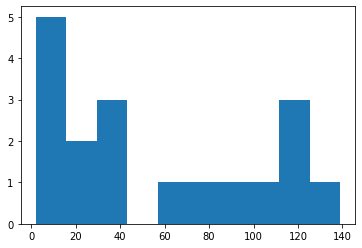

In [123]:
# your code here
ages_pop2 = pd.read_csv('../data/ages_population2.csv')
print("Frequency distribution = ", freq_dist(ages_pop2['observation']))
plt.hist(freq_dist(ages_pop2['observation']))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [76]:
"""
Now we have ages until 140 years, which doesn't make much sense.
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [124]:
# your code here
ages_pop2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [78]:
"""
The standard deviation is smaller, so the data should be more accurate.
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

Frequency distribution =  dict_values([37, 31, 31, 29, 26, 25, 25, 25, 25, 24, 24, 22, 22, 22, 21, 21, 21, 20, 19, 19, 19, 19, 18, 18, 17, 17, 17, 17, 17, 17, 15, 15, 15, 14, 14, 14, 14, 13, 12, 12, 12, 11, 11, 11, 11, 10, 10, 9, 9, 9, 8, 8, 8, 8, 6, 6, 6, 6, 6, 5, 4, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])


(array([15., 10.,  9., 11.,  8., 11.,  7.,  1.,  2.,  1.]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ]),
 <BarContainer object of 10 artists>)

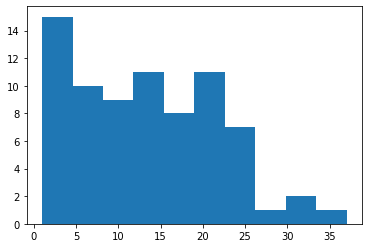

In [125]:
# your code here
ages_pop3 = pd.read_csv('../data/ages_population3.csv')
print("Frequency distribution = ", freq_dist(ages_pop3['observation']))
plt.hist(freq_dist(ages_pop3['observation']))

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [126]:
# your code here
ages_pop3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [81]:
"""
The results are similar from step 1. Mean and standard deviation a bit higher but in the same range.
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [127]:
# your code here
ages_pop3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [83]:
"""
your comments here
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [84]:
# your code here

In [85]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [86]:
# your code here

In [87]:
"""
your comments here
"""

'\nyour comments here\n'